In [ ]:
'''
@author Dat Nguyen 
Date: 6/14/18

This program demo how to interact with thingspeak data with python. 
This program retrieve data from Particle
Data is passed with an API key generate by ThingSpeak.com

'''

import requests,time,json
import numpy as np

numOfFeed = 4 # Number of feed you want The server to pass in one API call
api_key = 'https://api.thingspeak.com/channels/518268/feeds.json?results='+str(numOfFeed)

x_arr = list()
y_arr = list()
timer = 0

print("Starting... connection ")
# check if are there any value is being pass in the API key 
while(1):
    # read data generated with the API being passed 
    data_in_json = requests.get(api_key)

    parsed = json.loads(data_in_json.text)
    #print (json.dumps(parsed, indent=4, sort_keys=True))
    
    for i in range(numOfFeed):
        if (parsed['feeds'][i]['field2'] is not None):# process data if there is some data being passed
            y = int(parsed['feeds'][i]['field2'])
            y_arr.append(y)
        i = 0   
# Convert Json to Python Object

In [15]:
    
    # read data generated with the API being passed 
    data_in_json = requests.get(api_key)

    parsed = json.loads(data_in_json.text)
    print (json.dumps(parsed, indent=4, sort_keys=True))


{
    "channel": {
        "created_at": "2018-06-13T19:58:28Z",
        "description": "Log random temp point",
        "field1": "temp",
        "field2": "test",
        "field3": "ligthValue",
        "field4": "testStr",
        "id": 518268,
        "last_entry_id": 880,
        "latitude": "0.0",
        "longitude": "0.0",
        "name": "TemperatureTestParticleIO",
        "updated_at": "2018-06-14T21:28:00Z"
    },
    "feeds": [
        {
            "created_at": "2018-06-14T21:27:10Z",
            "entry_id": 877,
            "field1": "120",
            "field2": "43",
            "field3": "2",
            "field4": "testChar*"
        },
        {
            "created_at": "2018-06-14T21:27:28Z",
            "entry_id": 878,
            "field1": "135",
            "field2": "21",
            "field3": "1",
            "field4": "testChar*"
        },
        {
            "created_at": "2018-06-14T21:27:44Z",
            "entry_id": 879,
            "field1": "123",
 

[lightValue]: 3636=========== at:2018-06-27T18:39:40.617Z
[lightValue]: 3633=========== at:2018-06-27T18:39:45.684Z
[lightValue]: 2056=========== at:2018-06-27T18:39:50.692Z
[lightValue]: 3595=========== at:2018-06-27T18:39:55.654Z
[lightValue]: 3477=========== at:2018-06-27T18:40:00.702Z
[lightValue]: 3640=========== at:2018-06-27T18:40:05.692Z
[lightValue]: 3639=========== at:2018-06-27T18:40:10.744Z
[lightValue]: 3635=========== at:2018-06-27T18:40:15.772Z
[lightValue]: 3638=========== at:2018-06-27T18:40:20.782Z
[lightValue]: 3640=========== at:2018-06-27T18:40:25.762Z
[lightValue]: 3641=========== at:2018-06-27T18:40:30.762Z
[lightValue]: 3640=========== at:2018-06-27T18:40:35.732Z
[lightValue]: 3634=========== at:2018-06-27T18:40:40.752Z
[lightValue]: 3634=========== at:2018-06-27T18:40:45.832Z
[lightValue]: 3637=========== at:2018-06-27T18:40:50.812Z
[lightValue]: 3640=========== at:2018-06-27T18:40:55.862Z
[lightValue]: 3640=========== at:2018-06-27T18:41:00.772Z
[lightValue]: 

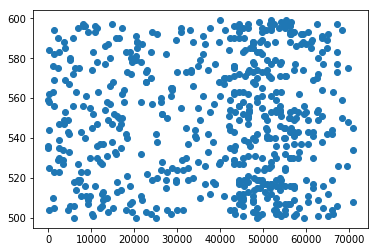

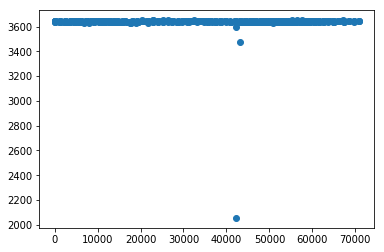

In [6]:
from firebase import firebase
import json 
import matplotlib.pyplot as plt

firebase = firebase.FirebaseApplication('https://particle-306ad.firebaseio.com', None)
result = firebase.get('/sensorLog/data', None )
#print (json.dumps(result, indent=4, sort_keys=True))
data = json.dumps(result)

# convert to dict 
t = []
tempPoints = []
lightValue = []
dataDict = json.loads(data)
for key,point in dataDict.items():
    print('[lightValue]: ' + point['lightValue'] + '=========== at:'+point['ts'])
    tempPoints.append(float(point['temp']))
    lightValue.append(float(point['lightValue']))
    # token data point
    time = point['ts'].split('T')
    token = time[1].replace('Z',':').split(':')
    t.append(float(token[0])*float(token[1])*60.0 + float(token[2]) )
    

print('')
print('GRAPH represent temp value(oC) vs t(s)')
plt.scatter(t,  tempPoints)
plt.show()

plt.scatter(t,lightValue)
plt.show()